# 3 - C - Giordano | Notebook

- La notebook debe analizar las siguientes universidades (grupo C):
>    - Universidad Nacional de Jujuy
>    - Universidad de Palermo
- Trabajar creando gráficos que expliquen las siguientes dimensiones:
> * Carrera
> * Edad
> * Género
> * Localidad
- Realizar un comparativo de inscripciones entre ambas universidades.
- Analizar correlaciones de variables, entre:
> * Carrera
> * Edad
> * Género
> * Localidad
- Presentar una conclusión final de lo analizado.

In [5]:
import pandas as pd
import numpy as np
import requests
from datetime import date, datetime, timedelta
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Universidad Nacional de Jujuy

In [6]:
df1 = pd.read_csv("datasets/3CUJujuy_select.csv", index_col=[0])
df1 = df1.sort_values(by='age', ascending=True)
df1["inscription_date"] = pd.to_datetime(df1["inscription_date"], format="%Y-%m-%d")
df1[['university', 'career', 'first_name', 'last_name', 'gender', 'postal_code', 'location', 'email']] = df1[['university', 'career', 'first_name', 'last_name', 'gender', 'postal_code', 'location', 'email']].astype('string')
df1.head()

,university,career,inscription_date,first_name,last_name,gender,age,postal_code,location,email
1069,universidad nacional de jujuy,licenciatura en ciencias antropológicas,2020-10-15,stephanie,washington,female,18,1706,haedo,josephescobar@yahoo.com
862,universidad nacional de jujuy,contador público,2020-09-21,alyssa,young,female,18,1983,gomez,matthew86@gmail.com
734,universidad nacional de jujuy,licenciatura en ciencias geológicas,2020-12-17,andrea,rocha,female,18,3346,bacacay,connorford@hotmail.com
567,universidad nacional de jujuy,licenciatura en producción de bioimagenes,2020-11-30,mary,flores,female,18,7009,iraola,maryjohnson@hotmail.com
916,universidad nacional de jujuy,licenciatura en planificación y diseño del pai...,2020-11-30,shaun,conrad,male,18,6401,sundblad,annturner@yahoo.com


In [7]:
total_unj = df1["university"].count()
print("La cantidad total de inscriptos es: " + str(total_unj))

La cantidad total de inscriptos es: 1189


### Se calcula la cantidad de inscriptos por carrera:

In [8]:
df1_career = df1.pivot_table(index='career', 
                          aggfunc='count', 
                          values='university')
df1_career.rename(columns={"university": "count_by_career"}, inplace=True)
df1_career.sort_values(by='count_by_career', ascending=False, inplace=True)
df1_career.reset_index(inplace=True)
df1_career.head(10)

,career,count_by_career
0,medicina,47
1,agronomía,46
2,ingeniería electrónica,44
3,ingeniería mecánica,44
4,bioquímica,43
5,licenciatura en gestión de agroalimentos,43
6,contador público,42
7,licenciatura en planificación y diseño del pai...,42
8,licenciatura en relaciones del trabajo,41
9,licenciatura en musicoterapia,41


> * La carrera con mayor número de inscriptos es: Medicina (47 inscriptos)

#### Promedio de inscriptos por carrera

In [9]:
kpi1 = df1_career["count_by_career"].mean()
print("El promedio de inscriptos por carrera es: " + str(int(kpi1)))

El promedio de inscriptos por carrera es: 36


### Se calcula la edad promedio por carrera:

In [10]:
df1_cage = df1.pivot_table(index="career", 
                          aggfunc="mean", 
                          values="age")
df1_cage.rename(columns={"age": "mean_age"}, inplace=True)
df1_cage.reset_index(inplace=True)
df1_cage.mean_age = df1_cage.mean_age.round()
df1_cage["mean_age"] = df1_cage["mean_age"].astype("int")
df1_cage.sort_values(by="mean_age", ascending=True, inplace=True)
df1_cage

,career,mean_age
7,diseño industrial,48
0,actuario,49
14,licenciatura en ciencia política,50
24,licenciatura en musicoterapia,51
9,ingeniería electrónica,51
20,licenciatura en ciencias de la educación,51
3,bioquímica,52
13,licenciatura en artes,52
28,licenciatura en relaciones del trabajo,53
2,arquitectura,53


#### Promedio de edad (general)

In [11]:
kpi2 = df1_cage["mean_age"].mean()
print("El promedio de edad de los inscriptos en la Universidad Nacional de Jujuy es de: " + str(round(kpi2))+ " años.")

El promedio de edad de los inscriptos en la Universidad Nacional de Jujuy es de: 55 años.


### Se calcula el promedio de años desde que se han inscripto a cada carrera:
> #### Con este fin primero se crea una columna que muestra el valor por inscripto

In [12]:
def datediff(x):
    today = date.today()
    age = today.year - x.year - ((today.month, today.day) < (x.month, x.day))
    return age

df1['years_since_inscription'] = df1['inscription_date'].apply(datediff)
df1.head()

,university,career,inscription_date,first_name,last_name,gender,age,postal_code,location,email,years_since_inscription
1069,universidad nacional de jujuy,licenciatura en ciencias antropológicas,2020-10-15,stephanie,washington,female,18,1706,haedo,josephescobar@yahoo.com,2
862,universidad nacional de jujuy,contador público,2020-09-21,alyssa,young,female,18,1983,gomez,matthew86@gmail.com,2
734,universidad nacional de jujuy,licenciatura en ciencias geológicas,2020-12-17,andrea,rocha,female,18,3346,bacacay,connorford@hotmail.com,1
567,universidad nacional de jujuy,licenciatura en producción de bioimagenes,2020-11-30,mary,flores,female,18,7009,iraola,maryjohnson@hotmail.com,1
916,universidad nacional de jujuy,licenciatura en planificación y diseño del pai...,2020-11-30,shaun,conrad,male,18,6401,sundblad,annturner@yahoo.com,1


In [13]:
df1_cinsc = df1.pivot_table(index='career', 
                          aggfunc='mean', 
                          values='years_since_inscription')
df1_cinsc.rename(columns={"years_since_inscription": "years_since_inscription_mean"}, inplace=True)
df1_cinsc.sort_values(by="years_since_inscription_mean", ascending=True, inplace=True)
df1_cinsc.reset_index(inplace=True)
df1_cinsc["years_since_inscription_mean"] = df1_cinsc["years_since_inscription_mean"].round(2)
df1_cinsc.head()

,career,years_since_inscription_mean
0,licenciatura en administración,1.26
1,licenciatura en artes,1.30
2,licenciatura en sociología,1.33
3,licenciatura en ciencia política,1.33
4,licenciatura en ciencias geológicas,1.36


#### Promedio de años desde la inscripción

In [14]:
kpi3 = df1_cinsc["years_since_inscription_mean"].mean()
print("El promedio de años desde la inscripción es: " + str(round(kpi3, 2)) + " años.")

El promedio de años desde la inscripción es: 1.45 años.


### Se calcula la cantidad de hombres y mujeres por carrera:

In [15]:
df1_cgen = df1.groupby(["gender", 'career'])['university'].count()
df1_cgen = df1_cgen.to_frame()
df1_cgen.reset_index(inplace=True)
df1_cgen.rename(columns={"university": "count_by_career"}, inplace=True)
df1_cgen.sort_values(by=["count_by_career"], ascending=False, inplace=True)
df1_cgen.head(10)

,gender,career,count_by_career
64,male,medicina,27
25,female,licenciatura en planificación y diseño del pai...,25
34,male,agronomía,25
42,male,ingeniería electrónica,25
56,male,licenciatura en kinesiología y fisiatría,24
55,male,licenciatura en gestión de agroalimentos,24
44,male,ingeniería mecánica,23
36,male,bioquímica,23
51,male,licenciatura en ciencias biológicas,23
28,female,licenciatura en relaciones del trabajo,22


> * La carrera más elegida por las mujeres es: Licenciatura en planificación y diseño del paisaje.
> * La carrera más elegida por los hombres es: Medicina.

### Se calcula cantidad de inscriptos por género:

In [16]:
df1_cgen2 = df1.pivot_table(index='gender', 
                          aggfunc='count', 
                          values='university')
df1_cgen2.rename(columns={"university": "count_by_gender"}, inplace=True)
df1_cgen2.reset_index(inplace=True)
df1_cgen2

,gender,count_by_gender
0,female,549
1,male,640


### Se calcula un nuevo campo para dividir los inscriptos por grupo etario:

In [17]:
def age_group(x):
    if x <= 27:
        return '18 a 27'
    elif x <= 37:
        return '28 a 37'
    elif x <= 47:
        return '38 a 47'
    elif x <= 57:
        return '48 a 57'
    elif x <= 67:
        return '58 a 67'
    elif x <= 77:
        return '68 a 77'
    elif x <= 87:
        return '78 a 87'
    else:
        return '88 a 90'
    
df1['age_group'] = df1['age'].apply(age_group)
df1.head()

,university,career,inscription_date,first_name,last_name,gender,age,postal_code,location,email,years_since_inscription,age_group
1069,universidad nacional de jujuy,licenciatura en ciencias antropológicas,2020-10-15,stephanie,washington,female,18,1706,haedo,josephescobar@yahoo.com,2,18 a 27
862,universidad nacional de jujuy,contador público,2020-09-21,alyssa,young,female,18,1983,gomez,matthew86@gmail.com,2,18 a 27
734,universidad nacional de jujuy,licenciatura en ciencias geológicas,2020-12-17,andrea,rocha,female,18,3346,bacacay,connorford@hotmail.com,1,18 a 27
567,universidad nacional de jujuy,licenciatura en producción de bioimagenes,2020-11-30,mary,flores,female,18,7009,iraola,maryjohnson@hotmail.com,1,18 a 27
916,universidad nacional de jujuy,licenciatura en planificación y diseño del pai...,2020-11-30,shaun,conrad,male,18,6401,sundblad,annturner@yahoo.com,1,18 a 27


In [18]:
df1_ager = df1.pivot_table(index='age_group', 
                          aggfunc='count', 
                          values='university')
df1_ager.rename(columns={"university": "count_by_age_group"}, inplace=True)
df1_ager.reset_index(inplace=True)
df1_ager.sort_values(by=["count_by_age_group"], ascending=False)

,age_group,count_by_age_group
0,18 a 27,183
5,68 a 77,174
4,58 a 67,164
6,78 a 87,159
3,48 a 57,154
2,38 a 47,146
1,28 a 37,142
7,88 a 90,67


> * El grupo etario con mayor cantidad de inscriptos es: 18 a 27 (182 inscriptos)

### Se calcula la localidad con más inscriptos:

In [19]:
df1_loc = df1.pivot_table(index='location', 
                          aggfunc='count', 
                          values='university')
df1_loc.rename(columns={"university": "count_by_location"}, inplace=True)
df1_loc.sort_values(by='count_by_location', ascending=False, inplace=True)
df1_loc.reset_index(inplace=True)
df1_loc.head()

,location,count_by_location
0,25 de mayo,6
1,bella vista,5
2,anguil,5
3,baños de la laja,4
4,amilgancho,4


> * La localidad con mayor número de inscriptos es: 25 de mayo (6 inscriptos)

# 2. Universidad de Palermo

In [20]:
df2 = pd.read_csv("datasets/3CUPalermo_select.csv", index_col=[0])
df2 = df2.sort_values(by='age', ascending=True)
df2["inscription_date"] = pd.to_datetime(df2["inscription_date"], format="%Y-%m-%d")
df2[['university', 'career', 'first_name', 'last_name', 'gender', 'postal_code', 'location', 'email']] = df2[['university', 'career', 'first_name', 'last_name', 'gender', 'postal_code', 'location', 'email']].astype('string')
df2.head()

,university,career,inscription_date,first_name,last_name,gender,age,postal_code,location,email
121,universidad de palermo,licenciatura en ciencias antropológicas,2020-09-05,linda,hawkins,female,18,5565,campo de los andes,hayeshailey@gmail.com
196,universidad de palermo,licenciatura en planificación y diseño del pai...,2020-10-27,brianna,bartlett,female,18,6746,cucha cucha,saramartin@yahoo.com
360,universidad de palermo,licenciatura en ciencia política,2020-09-11,warren,sexton,male,18,7165,faro querandi,jared28@hotmail.com
151,universidad de palermo,licenciatura en ciencias biológicas,2020-09-30,leah,roberts,female,18,8360,<NA>,moorejoseph@gmail.com
349,universidad de palermo,licenciatura en ciencias geológicas,2020-09-05,lauren,walker,female,18,1804,canning,madisonberry@hotmail.com


In [21]:
total_up = df2["university"].count()
print("La cantidad total de inscriptos es: " + str(total_up))

La cantidad total de inscriptos es: 607


### Se calcula la cantidad de inscriptos por carrera:

In [22]:
df2_career = df2.pivot_table(index='career', 
                          aggfunc='count', 
                          values='university')
df2_career.rename(columns={"university": "count_by_career"}, inplace=True)
df2_career.sort_values(by='count_by_career', ascending=False, inplace=True)
df2_career.reset_index(inplace=True)
df2_career.head(10)

,career,count_by_career
0,licenciatura en psicología,29
1,medicina,28
2,ciencias veterinarias,23
3,licenciatura en ciencias geológicas,23
4,ingeniería mecánica,22
5,licenciatura en gestión de agroalimentos,22
6,técnico para bioterios,21
7,diseño de imagen y sonido,21
8,licenciatura en ciencias de la educación,21
9,licenciatura en ciencia política,20


> * La carrera con mayor número de inscriptos es: Licenciatura en Psicología (29 inscriptos)

#### Promedio de inscriptos por carrera

In [23]:
kpi4 = df2_career["count_by_career"].mean()
print("El promedio de inscriptos por carrera es: " + str(int(kpi4)))

El promedio de inscriptos por carrera es: 18


### Se calcula la edad promedio por carrera:

In [24]:
df2_cage = df2.pivot_table(index="career", 
                          aggfunc="mean", 
                          values="age")
df2_cage.rename(columns={"age": "mean_age"}, inplace=True)
df2_cage.reset_index(inplace=True)
df2_cage.mean_age = df2_cage.mean_age.round()
df2_cage["mean_age"] = df2_cage["mean_age"].astype("int")
df2_cage.sort_values(by="mean_age", ascending=True, inplace=True)
df2_cage

,career,mean_age
30,licenciatura en terapia ocupacional,28
23,licenciatura en kinesiología y fisiatría,30
24,licenciatura en musicoterapia,32
13,licenciatura en artes,32
8,farmacia,33
6,diseño de imagen y sonido,33
10,ingeniería en informática,33
25,licenciatura en planificación y diseño del pai...,34
19,licenciatura en ciencias de la computación,34
5,contador público,34


#### Promedio de edad (general)

In [25]:
kpi5 = df2_cage["mean_age"].mean()
print("El promedio de edad de los inscriptos en la Universidad de Palermo es de: " + str(round(kpi5))+ " años.")

El promedio de edad de los inscriptos en la Universidad de Palermo es de: 36 años.


### Se calcula el promedio de años desde que se han inscripto a cada carrera:
> #### Con este fin primero se crea una columna que muestra el valor por inscripto

In [26]:
def datediff(x):
    today = date.today()
    age = today.year - x.year - ((today.month, today.day) < (x.month, x.day))
    return age

df2['years_since_inscription'] = df2['inscription_date'].apply(datediff)
df2.head()

,university,career,inscription_date,first_name,last_name,gender,age,postal_code,location,email,years_since_inscription
121,universidad de palermo,licenciatura en ciencias antropológicas,2020-09-05,linda,hawkins,female,18,5565,campo de los andes,hayeshailey@gmail.com,2
196,universidad de palermo,licenciatura en planificación y diseño del pai...,2020-10-27,brianna,bartlett,female,18,6746,cucha cucha,saramartin@yahoo.com,2
360,universidad de palermo,licenciatura en ciencia política,2020-09-11,warren,sexton,male,18,7165,faro querandi,jared28@hotmail.com,2
151,universidad de palermo,licenciatura en ciencias biológicas,2020-09-30,leah,roberts,female,18,8360,<NA>,moorejoseph@gmail.com,2
349,universidad de palermo,licenciatura en ciencias geológicas,2020-09-05,lauren,walker,female,18,1804,canning,madisonberry@hotmail.com,2


In [27]:
df2_cinsc = df2.pivot_table(index='career', 
                          aggfunc='mean', 
                          values='years_since_inscription')
df2_cinsc.rename(columns={"years_since_inscription": "years_since_inscription_mean"}, inplace=True)
df2_cinsc.sort_values(by="years_since_inscription_mean", ascending=True, inplace=True)
df2_cinsc.reset_index(inplace=True)
df2_cinsc["years_since_inscription_mean"] = df2_cinsc["years_since_inscription_mean"].round(2)
df2_cinsc.head()

,career,years_since_inscription_mean
0,actuario,1.33
1,licenciatura en gestión de agroalimentos,1.36
2,ingeniería mecánica,1.36
3,técnico para bioterios,1.38
4,licenciatura en ciencia y tecnología de alimentos,1.38


#### Promedio de años desde la inscripción

In [28]:
kpi6 = df2_cinsc["years_since_inscription_mean"].mean()
print("El promedio de años desde la inscripción es: " + str(round(kpi6, 2)) + " años.")

El promedio de años desde la inscripción es: 1.52 años.


### Se calcula la cantidad de hombres y mujeres por carrera:

In [29]:
df2_cgen = df2.groupby(["gender", 'career'])['university'].count()
df2_cgen = df2_cgen.to_frame()
df2_cgen.reset_index(inplace=True)
df2_cgen.rename(columns={"university": "count_by_career"}, inplace=True)
df2_cgen.sort_values(by=["count_by_career"], ascending=False, inplace=True)
df2_cgen.head(10)

,gender,career,count_by_career
27,female,licenciatura en psicología,16
32,female,técnico para bioterios,14
64,male,medicina,14
31,female,medicina,14
3,female,bioquímica,13
37,male,ciencias veterinarias,13
6,female,diseño de imagen y sonido,13
60,male,licenciatura en psicología,13
54,male,licenciatura en ciencias geológicas,13
14,female,licenciatura en ciencia política,12


> * La carrera más elegida por las mujeres es: Licenciatura en Psicología.
> * La carrera más elegida por los hombres es: Medicina.

### Se calcula cantidad de inscriptos por género:

In [30]:
df2_cgen2 = df2.pivot_table(index='gender', 
                          aggfunc='count', 
                          values='university')
df2_cgen2.rename(columns={"university": "count_by_gender"}, inplace=True)
df2_cgen2.reset_index(inplace=True)
df2_cgen2

,gender,count_by_gender
0,female,317
1,male,290


### Se calcula un nuevo campo para dividir los inscriptos por grupo etario:

In [31]:
def age_group(x):
    if x <= 27:
        return '18 a 27'
    elif x <= 37:
        return '28 a 37'
    elif x <= 47:
        return '38 a 47'
    elif x <= 57:
        return '48 a 57'
    elif x <= 67:
        return '58 a 67'
    elif x <= 77:
        return '68 a 77'
    elif x <= 87:
        return '78 a 87'
    else:
        return '88 a 90'
    
df2['age_group'] = df2['age'].apply(age_group)
df2.head()

,university,career,inscription_date,first_name,last_name,gender,age,postal_code,location,email,years_since_inscription,age_group
121,universidad de palermo,licenciatura en ciencias antropológicas,2020-09-05,linda,hawkins,female,18,5565,campo de los andes,hayeshailey@gmail.com,2,18 a 27
196,universidad de palermo,licenciatura en planificación y diseño del pai...,2020-10-27,brianna,bartlett,female,18,6746,cucha cucha,saramartin@yahoo.com,2,18 a 27
360,universidad de palermo,licenciatura en ciencia política,2020-09-11,warren,sexton,male,18,7165,faro querandi,jared28@hotmail.com,2,18 a 27
151,universidad de palermo,licenciatura en ciencias biológicas,2020-09-30,leah,roberts,female,18,8360,<NA>,moorejoseph@gmail.com,2,18 a 27
349,universidad de palermo,licenciatura en ciencias geológicas,2020-09-05,lauren,walker,female,18,1804,canning,madisonberry@hotmail.com,2,18 a 27


In [32]:
df2_ager = df2.pivot_table(index='age_group', 
                          aggfunc='count', 
                          values='university')
df2_ager.rename(columns={"university": "count_by_age_group"}, inplace=True)
df2_ager.reset_index(inplace=True)
df2_ager.sort_values(by=["count_by_age_group"], ascending=False)

,age_group,count_by_age_group
0,18 a 27,175
2,38 a 47,175
1,28 a 37,146
3,48 a 57,111


> * El grupo etario con mayor cantidad de inscriptos es: 18 a 27 y 38 a 47 (ambos con 176 inscriptos)

### Se calcula la localidad con más inscriptos:

In [33]:
df2_loc = df2.pivot_table(index='location', 
                          aggfunc='count', 
                          values='university')
df2_loc.rename(columns={"university": "count_by_location"}, inplace=True)
df2_loc.sort_values(by='count_by_location', ascending=False, inplace=True)
df2_loc.reset_index(inplace=True)
df2_loc.head()

,location,count_by_location
0,general rojo,4
1,capdepont,3
2,tristan suarez,3
3,bonpland norte,3
4,cerro aconcagua,3


> * La localidad con mayor número de inscriptos es: General Rojo (4 inscriptos)

# 3. U.N.J./U.P. - Análisis comparativo:

In [34]:
total_unj = df1["university"].count()
print("La cantidad total de inscriptos en la UNJ es: " + str(total_unj))

La cantidad total de inscriptos en la UNJ es: 1189


In [35]:
total_up = df2["university"].count()
print("La cantidad total de inscriptos en la UP es: " + str(total_up))

La cantidad total de inscriptos en la UP es: 607


> * En la UNJ hay aproximadamente el doble de inscriptos

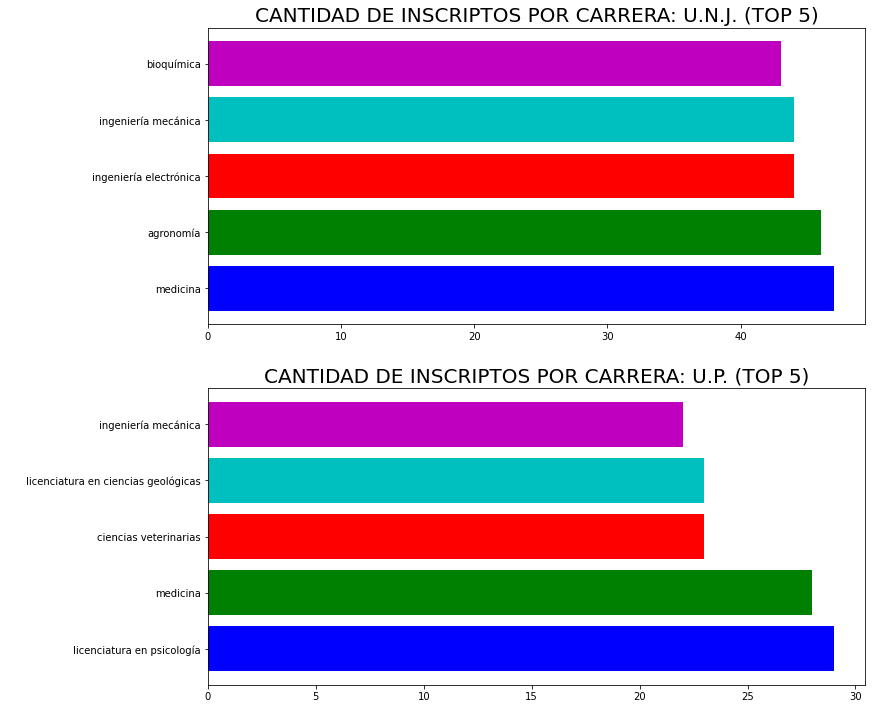

In [36]:
# Creating the figure and axes
fig, (ax1,ax2) = plt.subplots(nrows=2,ncols=1, figsize=(12,10), constrained_layout = True)
fig.patch.set_facecolor('white')

# Labels ans titles
ax1.set_title(str.upper('Cantidad de inscriptos por carrera: U.N.J. (top 5)'), fontsize=20)
ax1.set_xlabel(' ', fontsize=15)
ax1.set_ylabel(' ', fontsize=15, rotation='vertical')

ax2.set_title(str.upper(f'Cantidad de inscriptos por carrera: U.P. (top 5)'), fontsize=20)
ax2.set_xlabel(' ', fontsize=15)
ax2.set_ylabel(' ', fontsize=15, rotation='vertical')

# Plot 1
ax1.barh(df1_career['career'].head(5), 
        df1_career['count_by_career'].head(5).sort_values(ascending=False), 
        color=['b','g','r','c','m']
       )

# Plot 2
ax2.barh(df2_career['career'].head(5), 
        df2_career['count_by_career'].head(5).sort_values(ascending=False), 
        color=['b','g','r','c','m']
       )
plt.show()

> * En la UNJ la carrera con mayor número de inscriptos es: Medicina (47 inscriptos)
> * En la UP la carrera con mayor número de inscriptos es: Licenciatura en Psicología (29 inscriptos)

In [37]:
kpi1 = df1_career["count_by_career"].mean()
print("En la UNJ el promedio de inscriptos por carrera es: " + str(int(kpi1)))

En la UNJ el promedio de inscriptos por carrera es: 36


In [38]:
kpi4 = df2_career["count_by_career"].mean()
print("En la UP el promedio de inscriptos por carrera es: " + str(int(kpi4)))

En la UP el promedio de inscriptos por carrera es: 18


In [39]:
kpi2 = df1_cage["mean_age"].mean()
print("El promedio de edad de los inscriptos en la UNJ es de: " + str(round(kpi2))+ " años.")

El promedio de edad de los inscriptos en la UNJ es de: 55 años.


In [40]:
kpi5 = df2_cage["mean_age"].mean()
print("El promedio de edad de los inscriptos en la UP es de: " + str(round(kpi5))+ " años.")

El promedio de edad de los inscriptos en la UP es de: 36 años.


> * En la UP tiende a haber menos inscriptos por carrera, y su población tiende a ser más joven.

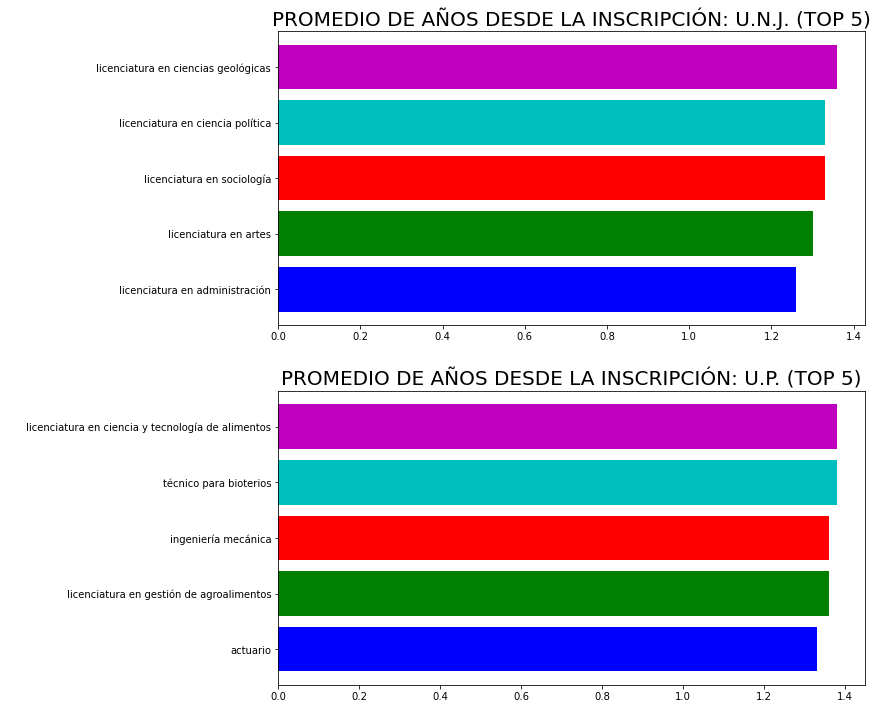

In [41]:
# Creating the figure and axes
fig, (ax1,ax2) = plt.subplots(nrows=2,ncols=1, figsize=(12,10), constrained_layout = True)
fig.patch.set_facecolor('white')

# Labels ans titles
ax1.set_title(str.upper('Promedio de años desde la inscripción: U.N.J. (top 5)'), fontsize=20)
ax1.set_xlabel(' ', fontsize=15)
ax1.set_ylabel(' ', fontsize=15, rotation='vertical')

ax2.set_title(str.upper(f'Promedio de años desde la inscripción: U.P. (top 5)'), fontsize=20)
ax2.set_xlabel(' ', fontsize=15)
ax2.set_ylabel(' ', fontsize=15, rotation='vertical')

# Plot 1
ax1.barh(df1_cinsc['career'].head(5), 
        df1_cinsc['years_since_inscription_mean'].head(5).sort_values(ascending=True), 
        color=['b','g','r','c','m']
       )

# Plot 2
ax2.barh(df2_cinsc['career'].head(5), 
        df2_cinsc['years_since_inscription_mean'].head(5).sort_values(ascending=True), 
        color=['b','g','r','c','m']
       )
plt.show()

In [42]:
kpi3 = df1_cinsc["years_since_inscription_mean"].mean()
print("El promedio de años desde la inscripción es: " + str(round(kpi3, 2)) + " años.")

El promedio de años desde la inscripción es: 1.45 años.


In [43]:
kpi6 = df2_cinsc["years_since_inscription_mean"].mean()
print("El promedio de años desde la inscripción es: " + str(round(kpi6, 2)) + " años.")

El promedio de años desde la inscripción es: 1.52 años.


> * En el promedio de años desde la inscripción no se observan diferencias significativas.

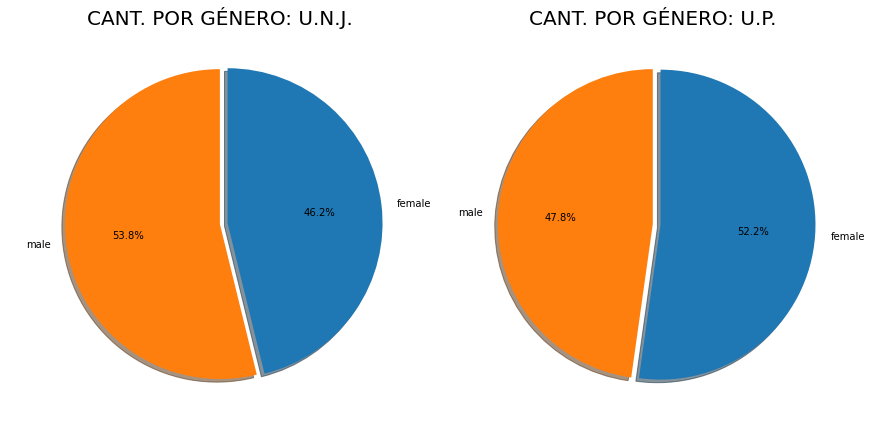

In [44]:
# Creating the figure and axes
fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2, figsize=(12,10), constrained_layout = True)
fig.patch.set_facecolor('white')

# Labels ans titles
ax1.set_title(str.upper('Cant. por género: U.N.J.'), fontsize=20)
ax1.set_xlabel(' ', fontsize=15)
ax1.set_ylabel(' ', fontsize=15, rotation='vertical')
explode_pie = (0.05, 0)

ax2.set_title(str.upper(f'Cant. por género: U.P.'), fontsize=20)
ax2.set_xlabel(' ', fontsize=15)
ax2.set_ylabel(' ', fontsize=15, rotation='vertical')

# Plot 1
ax1.pie(df1_cgen2['count_by_gender'],
        labels=df1_cgen2['gender'],
        explode=explode_pie,
        autopct='%1.1f%%',
        shadow=True, 
        startangle=90,
        counterclock=False,
        textprops=dict(color="k")
        #color=['b','g','r','c','m']
       )

# Plot 2
ax2.pie(df2_cgen2['count_by_gender'],
        labels=df2_cgen2['gender'],
        explode=explode_pie,
        autopct='%1.1f%%',
        shadow=True, 
        startangle=90,
        counterclock=False,
        textprops=dict(color="k")
        #color=['b','g','r','c','m']
       )
plt.show()

> * En la UNJ el 53,8% de los inscriptos son hombres.
> * En la UP el 52,2% de los inscriptos son mujeres.

> * En la UNJ la carrera más elegida por las mujeres es: Licenciatura en planificación y diseño del paisaje.
> * En la UNJ la carrera más elegida por los hombres es: Medicina.

> * En la UP la carrera más elegida por las mujeres es: Licenciatura en Psicología.
> * En la UP la carrera más elegida por los hombres es: Medicina.

> * Medicina es la carrera más elegida por los hombres en ambas universidades.

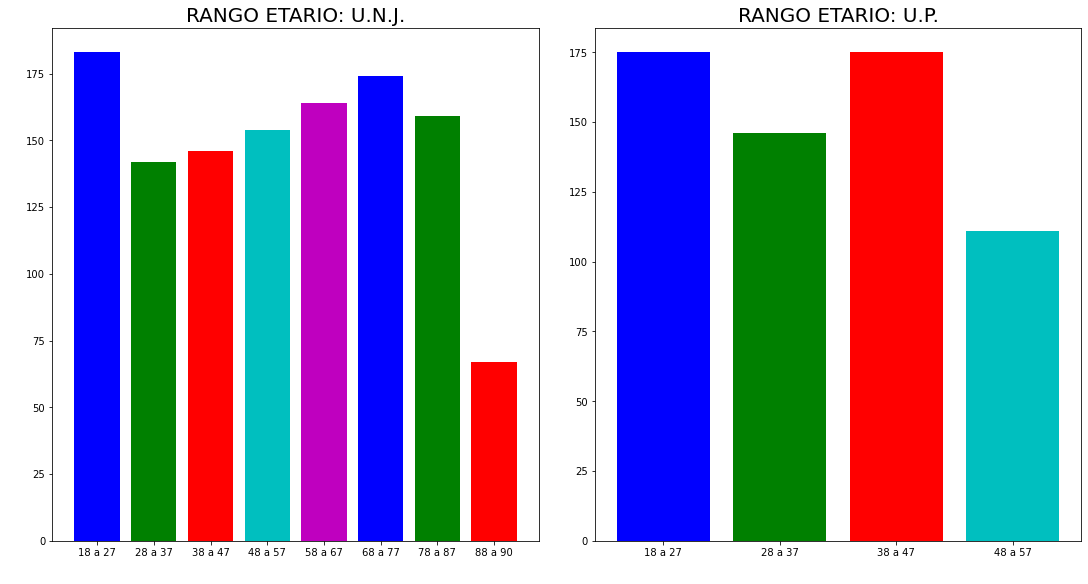

In [45]:
# Creating the figure and axes
fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2, figsize=(15,8), constrained_layout = True)
fig.patch.set_facecolor('white')

# Labels ans titles
ax1.set_title(str.upper('Rango etario: U.N.J.'), fontsize=20)
ax1.set_xlabel(' ', fontsize=15)
ax1.set_ylabel(' ', fontsize=15, rotation='vertical')

ax2.set_title(str.upper('Rango etario: U.P.'), fontsize=20)
ax2.set_xlabel(' ', fontsize=15)
ax2.set_ylabel(' ', fontsize=15, rotation='vertical')

# Plot 1
ax1.bar(df1_ager['age_group'], 
        df1_ager['count_by_age_group'], 
        color=['b','g','r','c','m']
       )

# Plot 2
ax2.bar(df2_ager['age_group'], 
        df2_ager['count_by_age_group'], 
        color=['b','g','r','c','m']
       )
plt.show()

> * En la UNJ el grupo etario con mayor cantidad de inscriptos es: 18 a 27 (182 inscriptos)
> * En la UP el grupo etario con mayor cantidad de inscriptos es: 18 a 27 y 38 a 47 (ambos con 176 inscriptos)

> * En ambas universidades parece haber un aumento significativo de las inscripciones entre los 18 y los 27 años. Sin embargo, en la UP también se observa un número significativo entre los 38 y los 47 años.
 
> * Por otro lado, en la UNJ las inscripciones se registran en todos los rangos (de 18 a 90 años). En la UP no se registran inscripciones después de los 57 años.

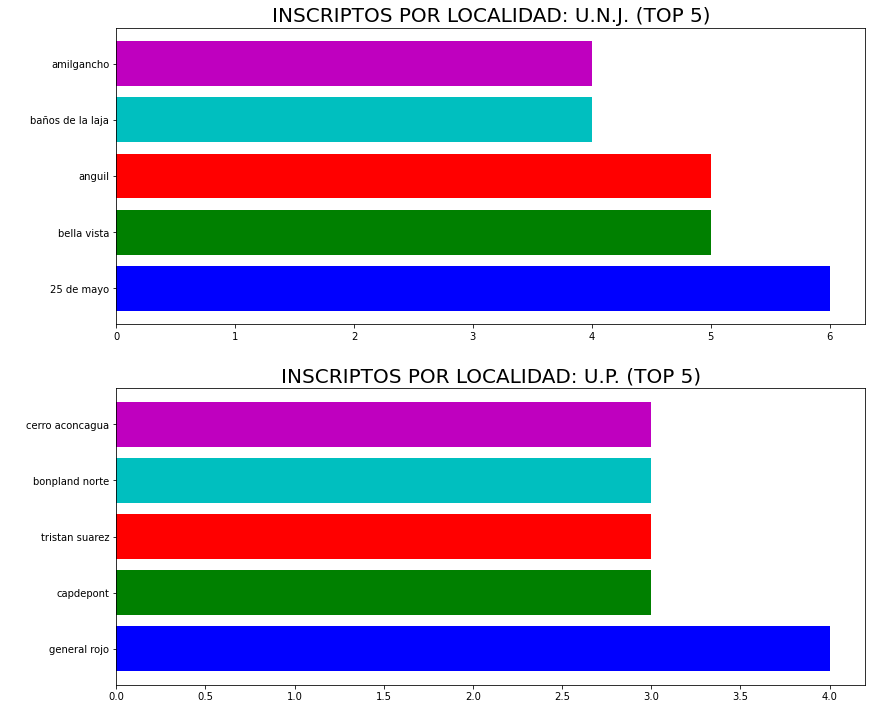

In [46]:
# Creating the figure and axes
fig, (ax1,ax2) = plt.subplots(nrows=2,ncols=1, figsize=(12,10), constrained_layout = True)
fig.patch.set_facecolor('white')

# Labels ans titles
ax1.set_title(str.upper('Inscriptos por localidad: U.N.J. (top 5)'), fontsize=20)
ax1.set_xlabel(' ', fontsize=15)
ax1.set_ylabel(' ', fontsize=15, rotation='vertical')

ax2.set_title(str.upper('Inscriptos por localidad: U.P. (top 5)'), fontsize=20)
ax2.set_xlabel(' ', fontsize=15)
ax2.set_ylabel(' ', fontsize=15, rotation='vertical')

# Plot 1
ax1.barh(df1_loc['location'].head(5), 
        df1_loc['count_by_location'].head(5).sort_values(ascending=False), 
        color=['b','g','r','c','m']
       )

# Plot 2
ax2.barh(df2_loc['location'].head(5), 
        df2_loc['count_by_location'].head(5).sort_values(ascending=False), 
        color=['b','g','r','c','m']
       )
plt.show()

> * En la UNJ la localidad con mayor número de inscriptos es: 25 de Mayo (6 inscriptos)
> * En la UP la localidad con mayor número de inscriptos es: General Rojo (4 inscriptos)

# 4. Conclusiones:

Tratándose de dos datasets que fueron creados de forma aleatoria resulta forzado el análisis. Sin embargo, se señalaron algunos indicadores, similitudes y diferencias que pudieron observarse en ambas universidades. En resumen:
* En la UNJ hay aproximadamente el doble de inscriptos
* En la UNJ la carrera con mayor número de inscriptos es: Medicina (47 inscriptos)
* En la UP la carrera con mayor número de inscriptos es: Licenciatura en Psicología (29 inscriptos)
* En la UP tiende a haber menos inscriptos por carrera, y su población tiende a ser más joven.
* En el promedio de años desde la inscripción no se observan diferencias significativas.
* En la UNJ el 53,8% de los inscriptos son hombres.
* En la UP el 52,2% de los inscriptos son mujeres.
* En la UNJ la carrera más elegida por las mujeres es: Licenciatura en planificación y diseño del paisaje.
* En la UNJ la carrera más elegida por los hombres es: Medicina.
* En la UP la carrera más elegida por las mujeres es: Licenciatura en Psicología.
* En la UP la carrera más elegida por los hombres es: Medicina.
* Medicina es la carrera más elegida por los hombres en ambas universidades.
* En la UNJ el grupo etario con mayor cantidad de inscriptos es: 18 a 27 (182 inscriptos)
* En la UP el grupo etario con mayor cantidad de inscriptos es: 18 a 27 y 38 a 47 (ambos con 176 inscriptos)
* En ambas universidades parece haber un aumento significativo de las inscripciones entre los 18 y los 27 años. Sin embargo, en la UP también se observa un número significativo entre los 38 y los 47 años.
* Por otro lado, en la UNJ las inscripciones se registran en todos los rangos (de 18 a 90 años). En la UP no se registran inscripciones después de los 57 años.
* En la UNJ la localidad con mayor número de inscriptos es: 25 de Mayo (6 inscriptos)
* En la UP la localidad con mayor número de inscriptos es: General Rojo (4 inscriptos)